# Demultiplexing de Secuencias

El ejercicio se basa en crear los métodos para hacer cada uno de los siguientes pasos.
El proceso que importa aquí es el llamado demultiplexing de las secuencias, en donde vienen marcadas con identificadores específicos y deben ser separadas ya que son de muestras diferentes.

1. Generar una secuencia con bases aleatorias
2. Generar secuenias aleatorias con un marcador al inicio de la misma, el método por parámetro recibe el total de secuencias, el total de marcadores, el largo de las secuencias y el largo de los marcadores.
3. Escribir las secuencias en un archivo fasta, generando un nombre para cada secuencia no el identificador
4. Leer las secuencias con BioPython y separarlas con base en el marcador que la identifica, esto seria tener listas individuales para cada marcador   
   
     
       Tip: usar choice para seleccionar una letra a la vez
    
 

In [101]:

from random import choice
from random import shuffle
from Bio import SeqIO
    
    
barcodes, reads = [], []
    
def randomSequence(length):
    """
    Hace tal cosa
    
    @param: length Length of the new sequence
    """
    read=""
    for count in range(length):
        read += choice("CGTA")
    return read

# generar las secuencias, y agregar los barcodes a la cantidad necesaria de secuencias
def generateSequences(totalReads, totalBarcodes, readLength, barcodeLength):
    s = int(totalReads/totalBarcodes)
    for i in range(totalBarcodes):
        tempBarcode = randomSequence(barcodeLength)
        barcodes.append(tempBarcode)
        
        for j in range(s):
            tempRead = tempBarcode + randomSequence(readLength)
            reads.append(tempRead)
            
    shuffle(reads)
    return reads

def writeSequencesInFasta(reads):
    with open("allreads.fasta", "w") as save_to:
        save_to.writelines(">sequence%d\n%s\n" %  (idx, read) for idx, read in enumerate(reads))

def demultiplexSequences():
    records = list(SeqIO.parse("allreads.fasta", "fasta"))
    
    sep = {}
    for i in barcodes:
        for sec in records:
            if str(sec.seq).startswith(i):
                if i in sep:
                    sep[i].append(sec)
                else:
                    sep[i] = [sec,]
        
    return sep



In [97]:
writeSequencesInFasta(generateSequences(100, 5, 140, 12))

In [100]:
demultiplexSequences()

{}

In [ ]:
# %load random_seq.py

In [48]:
import sys
from Bio import SeqIO

def sequence_cleaner(fasta_file, min_length=0, por_n=100):
    # Create our hash table to add the sequences
    sequences={}

    # Using the Biopython fasta parse we can read our fasta input
    for seq_record in SeqIO.parse(fasta_file, "fasta"):
        # Take the current sequence
        sequence = str(seq_record.seq).upper()
        # Check if the current sequence is according to the user parameters
        if (len(sequence) >= min_length and
            (float(sequence.count("N"))/float(len(sequence)))*100 <= por_n):
        # If the sequence passed in the test "is it clean?" and it isn't in the
        # hash table, the sequence and its id are going to be in the hash
            if sequence not in sequences:
                sequences[sequence] = seq_record.id
       # If it is already in the hash table, we're just gonna concatenate the ID
       # of the current sequence to another one that is already in the hash table
            else:
                sequences[sequence] += "_" + seq_record.id


    # Write the clean sequences

    # Create a file in the same directory where you ran this script
    with open("clear_" + fasta_file, "w+") as output_file:
        # Just read the hash table and write on the file as a fasta format
        for sequence in sequences:
            output_file.write(">" + sequences[sequence] + "\n" + sequence + "\n")

    print("CLEAN!!!\nPlease check clear_" + fasta_file)


userParameters = sys.argv[1:]

try:
    if len(userParameters) == 1:
        sequence_cleaner(userParameters[0])
    elif len(userParameters) == 2:
        sequence_cleaner(userParameters[0], float(userParameters[1]))
    elif len(userParameters) == 3:
        sequence_cleaner(userParameters[0], float(userParameters[1]),
                         float(userParameters[2]))
    else:
        print("There is a problem!")
except:
    print("There is a problem!")

There is a problem!


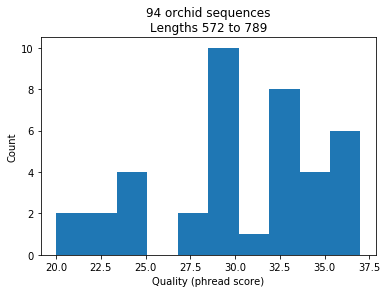

[22, 30, 30, 31, 24, 37, 24, 30, 30, 30, 34, 22, 28, 30, 30, 36, 33, 29, 33, 32, 21, 33, 36, 37, 36, 32, 27, 25, 29, 20, 35, 34, 33, 29, 33, 25, 36, 32, 34]


In [74]:
%matplotlib inline
from Bio import SeqIO
import matplotlib.pyplot as plt

sizes = [len(rec) for rec in SeqIO.parse("ls_orchid.fasta", "fasta")]

data = (min(rec.letter_annotations["phred_quality"]) for rec in \
              SeqIO.parse("200reads.fastq", "fastq") \
              if min(rec.letter_annotations["phred_quality"]) >= 20)

good_reads = list(data)
plt.hist(good_reads, bins=10)
plt.title("%i orchid sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
plt.xlabel("Quality (phread score)")
plt.ylabel("Count")
plt.show()
print(good_reads)